In [1]:
from typing import Pattern
import pandas as pd 
import numpy as np
import nltk
import csv
import re
from re import sub
import sys
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('french'))
from num2words import num2words
global str

In [2]:
path_data = "data/data-training-clean.csv"
path_test = "data/exportNETSOINS_TRANSMISSIONS_semaine319.csv"
categories = ['GRIPPE_IRA', 'GEA_DIARRHEES', 'SUSPICION_TIAC', 'CHUTES', 'APPEL_SAMU', 'VACCINATION']

PATTERN_SUPP_HTML : Pattern = re.compile(r'<(.*?)>')
REPLACE_NO_SPACE : Pattern= re.compile(r"['&@¨^.;:!*=\%?,#<>\"()\[\]]")
REPLACE_WITH_SPACE : Pattern = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)|°")

In [3]:
REPLACE_NUM_TO_STRING =  re.compile(r'\d+')
SUP_EURREUR_SUITE =  re.compile(r'\bsuite\b|\berreur\b|\bphpdbdriverocilonguechaine\b')

In [4]:
# nettoyer le texte 
def preprocess_clean(reviews):
    reviews = reviews.lower()
    ''' 
    if type(reviews) == str:
        reviews = str(reviews).lower() # mettre le texte en minuscule
    else : 
        print(reviews)
        
    '''

    reviews = re.sub(r'\bagrave\b', 'a', reviews) #replacer agrave par a (!à)
    reviews = re.sub(r'\beacut\b|\begrave\b|\bpreacute\b', 'e', reviews)#

    
    sub_html = re.findall(PATTERN_SUPP_HTML, reviews) #supprimer les balise html
    for html in sub_html:
        if html:
            reviews = re.sub(r'\s+', ' ', reviews)
            reviews = re.sub(r"\'", ' ', reviews)
            reviews = reviews.replace(html, ' ')
            reviews = reviews.replace('< >', ' ')
            
    #print('1 : ',reviews)
    reviews = REPLACE_NO_SPACE.sub(' ', reviews) #supprimer tout les caracteres [.;:!=\%?,\"()\[\]]
    #print('2 : ',reviews)
    reviews = REPLACE_WITH_SPACE.sub(' ', reviews) #supprimer espace entre balise html au cas où y'en a 
    reviews = reviews.replace('ttt', 'traitement') 
    reviews = re.sub(r"([+])", ' plus ', reviews)
    reviews = re.sub(r"([+])", ' ', reviews)
    
    
    # transformer les chiffres numérique en alphabet 
    num_to_string = re.findall(REPLACE_NUM_TO_STRING, reviews)
    reviews = re.split(r'(\d+)', reviews)
    reviews = ' '.join(reviews)
    for N_T_S in num_to_string:
        if N_T_S:
            cible = num2words(N_T_S, lang='fr')
            reviews = re.sub(r'\b'+N_T_S+r'\b', cible, reviews)
    #'''
    
    eurr = re.findall(SUP_EURREUR_SUITE, reviews)
    if eurr:
        transs = reviews.split()
        if len(transs) == 1 :
            reviews = 'SUP_EURREUR_SUITE_OKOKOK'
    #'''       
    reviews = re.sub(r'[0-9]', ' ', reviews)    
    #reviews = re.sub(r'\b\w{1,3}\b',' ', reviews)

    #La première manipulation souvent effectuée dans le traitement du texte est la suppression de ce qu'on 
    #appelle en anglais les stopwords. Ce sont les mots très courants dans la langue étudiée 
    #("et", "à", "le"... en français) qui n'apportent pas de valeur informative pour la compréhension 
    #du "sens" d'un document et corpus. Il sont très fréquents et ralentissent notre travail : 
    #nous souhaitons donc les supprimer.
    for word in reviews.split() :
        if word in stop_words or len(word) < 2:
            word = r'\b' + word + r'\b'
            reviews = re.sub(word, '', reviews)
         
    reviews = re.sub(' +', ' ', reviews)#supprimer tout espace de plus qui peut exister à la fin de traitement
    return reviews

In [5]:
#df = pd.read_excel(path_data, index_col=0) 
#df = df[['libelle2', 'GRIPPE_IRA', 'GEA_DIARRHEES', 'SUSPICION_TIAC', 'CHUTES', 'APPEL_SAMU', 'VACCINATION']]
#df = df[df['libelle2'].str.strip().astype(bool)]
#df = df[df['libelle2'].str.strip().astype(bool)] #df.iloc[:, df.columns != 'libelle2'].astype(int)


In [6]:
#df[categories] = df[categories].apply(lambda x: x.astype(int))#cast float(False ou True) en 0 ou 1
#df.libelle2 = df.libelle2.apply(lambda x: preprocess_clean(x))#nettoyer le texte la colonne libelle2
#df = df.sample(frac=1).reset_index(drop=True) #mélanger les données
#df.head(20)

In [7]:
#df.to_csv('data/data-training-clean.csv', sep=';', encoding='utf-8')

In [8]:
df = pd.read_csv(path_data, encoding='utf-8', sep=";")
df = df.dropna()
#df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.head()

,Unnamed: 0,libelle2,GRIPPE_IRA,GEA_DIARRHEES,SUSPICION_TIAC,CHUTES,APPEL_SAMU,VACCINATION
0,0,le à h type ecpascore commentaire au couch...,0,0,0,0,0,0
1,1,mr n'a pas mangé ce matin et très peu bu duran...,0,0,0,0,0,0
2,2,réception et mise en place de ses nouvelles ch...,0,0,0,0,0,0
3,3,hg à g l ce jour prochain bilan le,0,0,0,0,0,0
4,4,compte rendu psychomotricité groupe thérapeuti...,0,0,0,0,0,0


# Pre-Processing 

In [9]:
df.libelle2 = df.libelle2.apply(lambda x: preprocess_clean(x))#nettoyer le texte la colonne libelle2
df = df[~df.libelle2.str.contains(r'\bSUP_EURREUR_SUITE_OKOKOK\b')]
df.head(10)

,Unnamed: 0,libelle2,GRIPPE_IRA,GEA_DIARRHEES,SUSPICION_TIAC,CHUTES,APPEL_SAMU,VACCINATION
0,0,type ecpascore commentaire coucher lors c...,0,0,0,0,0,0
1,1,mr mangé matin très peu bu durant petit déjeuner,0,0,0,0,0,0
2,2,réception mise place nouvelles chaussures chut,0,0,0,0,0,0
3,3,hg jour prochain bilan,0,0,0,0,0,0
4,4,compte rendu psychomotricité groupe thérapeuti...,0,0,0,0,0,0
5,5,demande prescription faite mt feuille mesure p...,0,0,0,0,0,0
6,6,midi vue fille expliquée maman voulue être la...,0,0,0,0,0,0
7,7,soin installation petit déjeunerrégimes régime...,0,0,0,0,0,0
8,8,soin pedicuriefraisage massage,0,0,0,0,0,0
9,9,mme vue début nuit fc sat siffle peu ni vni ni...,0,0,0,0,0,0


In [10]:
#x = df.iloc[:, df.columns == 'GRIPPE_IRA'].astype(int)

#df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(651001 - len(df), len(df))


1746 649255


In [11]:
output = df.drop_duplicates()
print('GRIPPE_IRA : ', output.groupby('GRIPPE_IRA').size())
print('GEA_DIARRHEES :', output.groupby('GEA_DIARRHEES').size())
print('SUSPICION_TIAC :', output.groupby('SUSPICION_TIAC').size())
print('CHUTES :', output.groupby('CHUTES').size())
print('APPEL_SAMU :', output.groupby('APPEL_SAMU').size())
print('VACCINATION :', output.groupby('VACCINATION').size())

GRIPPE_IRA :  GRIPPE_IRA
0    648201
1      1054
dtype: int64
GEA_DIARRHEES : GEA_DIARRHEES
0    648850
1       405
dtype: int64
SUSPICION_TIAC : SUSPICION_TIAC
0    648891
1       364
dtype: int64
CHUTES : CHUTES
0    622870
1     26385
dtype: int64
APPEL_SAMU : APPEL_SAMU
0    646497
1      2758
dtype: int64
VACCINATION : VACCINATION
0    648728
1       527
dtype: int64


In [12]:
'''
df_Test = pd.read_csv(path_test, encoding='utf-8', sep=";")
#df_Test = df_Test.head(1000)
df_Test = df_Test[['libelle2']]
df_Test = df_Test[df_Test['libelle2'].str.strip().astype(bool)]
df_Test.libelle2 = df_Test.libelle2.apply(lambda x: preprocess_clean(x))
df_Test = df_Test.sample(frac=1).reset_index(drop=True) #mix data
df_Test.head(10)
'''


'\ndf_Test = pd.read_csv(path_test, encoding=\'utf-8\', sep=";")\n#df_Test = df_Test.head(1000)\ndf_Test = df_Test[[\'libelle2\']]\ndf_Test = df_Test[df_Test[\'libelle2\'].str.strip().astype(bool)]\ndf_Test.libelle2 = df_Test.libelle2.apply(lambda x: preprocess_clean(x))\ndf_Test = df_Test.sample(frac=1).reset_index(drop=True) #mix data\ndf_Test.head(10)\n'

In [13]:
data = []
cont = 0

for id_, libelle2, GRIPPE_IRA, GEA_DIARRHEES, SUSPICION_TIAC, CHUTES, APPEL_SAMU, VACCINATION in df.values.tolist():
    lable = ''

    #print(id_, libelle2)

    if CHUTES:
        #print(id_, libelle2)
        lable += 'CHUTES '
        data.append((libelle2, lable))
    '''
    elif GEA_DIARRHEES :
        lable += 'GEA_DIARRHEES '
        data.append((libelle2, lable))
        
    elif SUSPICION_TIAC : 
        lable += 'SUSPICION_TIAC '
        data.append((libelle2, lable))
    
    #elif CHUTES : 
    if CHUTES :
        lable += 'CHUTES '
        data.append((libelle2, lable))
    
    elif APPEL_SAMU :
        #print(id_, libelle2)
        lable += 'APPEL_SAMU '
        data.append((libelle2, lable))
    elif VACCINATION :
        lable += 'VACCINATION '
        data.append((libelle2, lable))
    ''' 
    
    if lable == '':
        #print(id_, libelle2)
        lable = 'RIEN'
        cont += 1
        
        
    if lable == 'RIEN' and cont % 20 == 0: 
        data.append((libelle2, lable))
        
        
    
    lable = ''

In [14]:
len(data)

57528

In [15]:
from sklearn.preprocessing import LabelEncoder

df_data = pd.DataFrame(data, columns =['libelle2', 'label']) 
df_data = df_data.sample(frac=1).reset_index(drop=True)

#ajouter une colonne où on transmet le label en nombre correspondant.
LE = LabelEncoder()
df_data['label_num'] = LE.fit_transform(df_data['label'])
df_data.head(10)

,libelle2,label,label_num
0,date témoin sans témoinlieu chambre résidentpo...,CHUTES,0
1,nouveau fr coquille devrait arriver mardi proc...,RIEN,1
2,merci contacter bureau rdv traumatologie becle...,CHUTES,0
3,mme rentre jambes résidants salon,RIEN,1
4,date témoin sans témoinlieu couloirposition av...,CHUTES,0
5,date témoin lequeux nathalielieu premier étage...,CHUTES,0
6,relevé tiers ouirelevé matériel aide transfert...,CHUTES,0
7,ongles coupé jour,RIEN,1
8,essouflement matin,RIEN,1
9,date témoin sans témoinlieu chambre résidentpo...,CHUTES,0


In [16]:
display(df_data.groupby(['label'])['libelle2'].count())

print(26385 /(26385+31143) * 100)

label
CHUTES     26385
RIEN       31143
Name: libelle2, dtype: int64

45.86462244472257


# Normaliser les données 

In [17]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 60000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 512
# This is fixed.
EMBEDDING_DIM = 100
texts = df_data['libelle2'].astype('str')
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 45684 unique tokens.


In [18]:
dict(list(word_index.items())[0:10])


{'non': 1,
 'chute': 2,
 'prévenu': 3,
 'sans': 4,
 'aide': 5,
 'plus': 6,
 'chambre': 7,
 'résident': 8,
 'relevé': 9,
 'moment': 10}

In [19]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (57528, 512)


In [20]:
Y = df_data['label_num'].values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (57528,)


# Data of training 

In [21]:
data_apprenti = []
for x, y in zip(X, Y):
    data_apprenti.append((x, y))

In [22]:
df_apprentissage = pd.DataFrame(data_apprenti, columns =['description', 'label'])
print(len(df_apprentissage))
df_apprentissage.head()

57528


,description,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


In [23]:
len(df_apprentissage)

57528

In [24]:
#df_apprentissage.to_csv('data/data-apprentissage.csv', sep=';', encoding='utf-8')

# Train test split 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
#X_train

(46022, 512) (46022,)
(11506, 512) (11506,)


In [27]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import ModelCheckpoint, EarlyStopping
# fix random seed for reproducibility
numpy.random.seed(7)

# Créer le modèle

In [28]:
# create the model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 512, 100)          6000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 512, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 402       
Total params: 6,241,202
Trainable params: 6,241,202
Non-trainable params: 0
_________________________________________________________________
None


In [200]:
epochs = 5
batch_size = 100

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]).history



Train on 36817 samples, validate on 9205 samples
Epoch 1/5
36817/36817 [==============================] - 1111s 30ms/step - loss: 0.1507 - acc: 0.9439 - val_loss: 0.0670 - val_acc: 0.9839
Epoch 2/5
36817/36817 [==============================] - 1111s 30ms/step - loss: 0.0435 - acc: 0.9883 - val_loss: 0.0608 - val_acc: 0.9845
Epoch 3/5
36817/36817 [==============================] - 1438s 39ms/step - loss: 0.0274 - acc: 0.9918 - val_loss: 0.0636 - val_acc: 0.9798
Epoch 4/5
36817/36817 [==============================] - 1254s 34ms/step - loss: 0.0184 - acc: 0.9946 - val_loss: 0.0700 - val_acc: 0.9821
Epoch 5/5
36817/36817 [==============================] - 1139s 31ms/step - loss: 0.0145 - acc: 0.9959 - val_loss: 0.0769 - val_acc: 0.9813


#### temps d'apprentissage : 
###### chute : 1.2991667h

###### 27/02/2020  des chutes est de 38.84259804498881% sur 67928 l'ensemble des données d'apprentissage 


In [29]:
model.save_weights("model/model-CHUTES-04-03.h5")

In [30]:
model.load_weights("model/model-CHUTES-V2.h5", by_name=True)

In [31]:
accr = model.evaluate (X_test, Y_test) 
print ('Test set \nLoss: {: 0.3f} \nPrécision: {: 0.3f}'. format (accr [0], accr [1]))

11506/11506 [==============================] - 94s 8ms/step
Test set 
Loss:  0.691 
Précision:  0.689


In [203]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['acc']
    val_acc = history['val_acc']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.legend()
    plt.savefig('images/Loss-CHUTES-de-symptômes-.png')
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.legend()
    plt.savefig('images/Accuracy-CHUTES-de-symptômes-.png')
    
    plt.show()
    

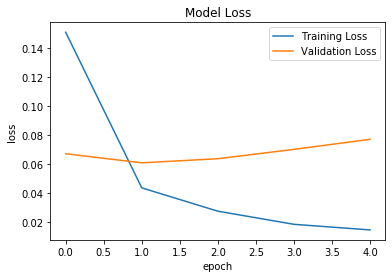

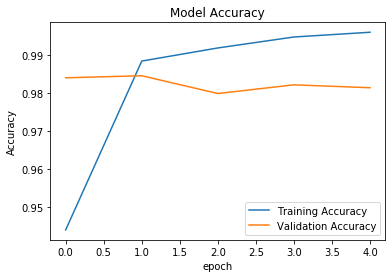

In [204]:
import matplotlib.pyplot as plt
plot_metrics(history)

# Tester avec des nouvelles transmissions 
#### la semaine du 10/02 au 16/02

In [174]:
new_transmissions_grppe = ["BILAN BIO DEMANDÉ INFECTIEUX , SERO GRIPPALEGAÏACS SUR SELLES , SUSPICION D'UN SYNDROME \
                NÉOPLASIQUEKINÉ RESPIRATOIRE", 
                 "SUITE CONSULTATION : D'APÈS SON ACCOMPAGNATEUR : PAS DE PB PNEUMO, PAS DE VISITE \
                 À REPROGRAMMER. DEMANDE DE ME DENIS POUR ARRET DU DIURÉTIQUE, PNEUMOLOGUE PAS CONTRE \
                 À PRIORI MAIS ABSENCE DE COMPTE RENDU. DEMANDE DE CONSULTATION FAITE AVEC LE DR FROMONT,\
                 VIENDRA DEMAIN OU VENDREDI.",
                "ETAT GÉNÉRAL OKTOUSSE PEU, NON ENCOMBRÉTRAITEMENT TAMIFLU + ANTIBIOTIQUES DONNÉS HIER \
                ET AUJOURDH'UIAIMERAIT QU'ON LUI APPORTE LE JOURNAL LE MATIN CAR ÉTANT ISOLÉ IL NE PEUT \
                PAST°= 36.8°C À 10HINJECTION DE ZARZIO FAIT LE 11/02", 
                "GRIPPE A CONFIRMÉE, RESPIRATION SIFFLANTE REMARQUÉE AUJOURD'HUI PLUS QUE LES AUTRES JOURS", 
                "A DES APPAREILS AUDITIFS DES 2 COTÉS ET DES LUNETTESA SAVOIR : A ÉTÉ HOSPITALISÉE EN DÉCEMBRE\
                EN SERVICE DE RÉANIMATION POUR UNE PNEUMOPATHIE"]

new_transmissions_chutes = ["LES CULOTTES DE MME P SONT TOUTE DÉCHIRÉES ET ÇA TOMBE QUAND ELLE MARCHE",
                          "CHUTE DANS LA SALLE DE BAIN CET APRÈS MIDI, SANS GRAVITÉ.TA=114/75; POULS=103; T°=36.7°C, SAT=96%.LA FAMILLE(FILS) APPELÉ QUI NE RÉPOND PAS, MESSAGE VOCAL LAISSÉ SUR LE RÉPONDEUR TÉLÉPHONIQUE.A SURVEILLER+++++."]


In [175]:
for transmissions in new_transmissions_grppe :
    transmissions = [preprocess_clean(transmissions)]
    seq = tokenizer.texts_to_sequences(transmissions)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)

    labels = ['GRIPPE_IRA', 'rien']
    print('pred : ', labels[np.argmax(pred)])

pred :  rien
pred :  rien
pred :  rien
pred :  rien
pred :  rien


In [27]:
path_test = "data/test/exportNETSOINS_TRANSMISSIONS__semaine319.csv"
df_test = pd.read_csv(path_test, encoding='utf-8', sep=";")
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test = df_test[['libelle2','CHUTES']]
df_test = df_test.head(3000)
df_test.head()

,libelle2,CHUTES
0,BILAN SANGUIN À JEUN DEMAIN -> PANCARTE SUR LA...,False
1,DOUCHÉ A 3 REPRISE,False
2,"CE SOIR PAS DE VOMISSEMENT, NI DE NAUSÉES, A B...",False
3,"NOUS LUI AVONS DONNÉ À BOIRE, IDE PREVENUE",False
4,TA 147/74,False


In [29]:
import time

labels = ['CHUTE', 'RIEN']
tab_predict = []

start_time = time.time()
for libelle2, CHUTES in df_test.values.tolist():
    transmissions = [preprocess_clean(libelle2)]

    seq = tokenizer.texts_to_sequences(transmissions)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model.predict(padded)

    #print('pred : ', labels[np.argmax(pred)])
    prediction = labels[np.argmax(pred)]
    
    #if CHUTES == False and prediction == 'GRIPPE' :
    tab_predict.append((libelle2, CHUTES, prediction))
        
print("%s seconds" % (time.time() - start_time))


229.77576804161072 seconds


In [30]:
df_predict = pd.DataFrame(tab_predict, columns =['libelle2', 'CHUTES', 'prediction']) 
print(len(df_predict))
df_predict.head()

3000


,libelle2,CHUTES,prediction
0,BILAN SANGUIN À JEUN DEMAIN -> PANCARTE SUR LA...,False,RIEN
1,DOUCHÉ A 3 REPRISE,False,RIEN
2,"CE SOIR PAS DE VOMISSEMENT, NI DE NAUSÉES, A B...",False,RIEN
3,"NOUS LUI AVONS DONNÉ À BOIRE, IDE PREVENUE",False,RIEN
4,TA 147/74,False,RIEN


In [31]:
display(df_predict.groupby(['prediction'])['libelle2'].count())
display(df_predict.groupby(['CHUTES'])['libelle2'].count())


prediction
CHUTE    1037
RIEN     1963
Name: libelle2, dtype: int64

CHUTES
False    2888
True      112
Name: libelle2, dtype: int64

In [394]:
df_predict.to_csv('data/test/data-tester-GRIPPE_IRA.csv', sep=';', encoding='utf-8')

In [380]:
len(df_test), len(df_predict) 

(1000, 60)

In [381]:
output = df_predict.drop_duplicates()
print('CHUTES : ', output.groupby('CHUTES').size())
print('prediction : ', output.groupby('prediction').size())

CHUTES :  CHUTES
False    20
True     34
dtype: int64
prediction :  prediction
CHUTES    53
RIEN       1
dtype: int64


In [153]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

In [154]:
model_dict = {#'Dummy' : DummyClassifier(random_state=3),
              'Stochastic Gradient Descent' : SGDClassifier(random_state=3, loss='log'),
              #'Random Forest': RandomForestClassifier(random_state=3),
              #'Decsision Tree': DecisionTreeClassifier(random_state=3),
              #'AdaBoost': AdaBoostClassifier(random_state=3),
              #'Gaussian Naive Bayes': GaussianNB(),
              #'K Nearest Neighbor': KNeighborsClassifier()
             }

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .3, 
                                                    shuffle = True, 
                                                    #stratify = y, 
                                                    random_state = 42)

In [162]:
def model_score_df(model_dict):   
    model_name, ac_score_list, p_score_list, r_score_list, f1_score_list = [], [], [], [], []
    for k,v in model_dict.items():   
        model_name.append(k)
        print('lancement de training....')
        v.fit(X_train, Y_train)
        y_pred = v.predict(X_test)
        print(k, accuracy_score(Y_test, y_pred))
        ac_score_list.append(accuracy_score(Y_test, y_pred))
        p_score_list.append(precision_score(Y_test, y_pred, average='macro'))
        r_score_list.append(recall_score(Y_test, y_pred, average='macro'))
        f1_score_list.append(f1_score(Y_test, y_pred, average='macro'))
        model_comparison_df = pd.DataFrame([model_name, ac_score_list, p_score_list, r_score_list, f1_score_list]).T
        model_comparison_df.columns = ['model_name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score']
        model_comparison_df = model_comparison_df.sort_values(by='f1_score', ascending=False)
    return model_comparison_df, v




In [163]:
df_bset_model, model_sklearn = model_score_df(model_dict)

lancement de training....
Stochastic Gradient Descent 0.9300127713920817


In [165]:
type(model_sklearn)

sklearn.linear_model.stochastic_gradient.SGDClassifier

In [168]:
import time

labels = ['GRIPPE', 'RIEN']
tab_predict = []

start_time = time.time()
for libelle2, CHUTES in df_test.values.tolist():
    transmissions = [preprocess_clean(libelle2)]

    seq = tokenizer.texts_to_sequences(transmissions)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred = model_sklearn.predict(padded)

    #print('pred : ', labels[np.argmax(pred)])
    prediction = labels[np.argmax(pred)]
    if prediction != 'GRIPPE':
        print(prediction)
    #if CHUTES == False and prediction == 'GRIPPE' :
    tab_predict.append((libelle2, CHUTES, prediction))
        
print("%s seconds" % (time.time() - start_time))

39.870185136795044 seconds
